In [1]:
!nvidia-smi

Wed Aug  7 14:15:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/YOLO/

/content/drive/MyDrive/YOLO


In [7]:
!ls

data  data.zip	Yolov8.ipynb


In [8]:
!unzip data.zip -d data

Archive:  data.zip
replace data/data/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/data/data.yaml     
  inflating: data/data/test/images/1.jpeg  
  inflating: data/data/test/images/10.jpeg  
  inflating: data/data/test/images/11.jpeg  
  inflating: data/data/test/images/12.jpeg  
  inflating: data/data/test/images/13.jpeg  
  inflating: data/data/test/images/14(1).jpeg  
  inflating: data/data/test/images/14.jpg  
  inflating: data/data/test/images/15.jpeg  
  inflating: data/data/test/images/16.jpeg  
  inflating: data/data/test/images/17.jpeg  
  inflating: data/data/test/images/18.jpeg  
  inflating: data/data/test/images/19.jpeg  
  inflating: data/data/test/images/2.jpeg  
  inflating: data/data/test/images/20.jpeg  
  inflating: data/data/test/images/21.jpeg  
  inflating: data/data/test/images/22.jpeg  
  inflating: data/data/test/images/23.jpeg  
  inflating: data/data/test/images/24.jpeg  
  inflating: data/data/test/images/25.jpeg  
  inflating: data/d

In [9]:
%cd data

/content/drive/MyDrive/YOLO/data


In [10]:
!ls

data


In [11]:
%cd data

/content/drive/MyDrive/YOLO/data/data


In [16]:
!ls

data.yaml  runs  test  train  valid  yolov8s.pt


In [17]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

In [18]:
!ls runs/detect/train5/

args.yaml					    R_curve.png		train_batch122.jpg
confusion_matrix.png				    results.csv		train_batch1.jpg
events.out.tfevents.1723040534.df910c68801d.2259.0  results.png		train_batch2.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_labels.jpg
P_curve.png					    train_batch120.jpg	val_batch0_pred.jpg
PR_curve.png					    train_batch121.jpg	weights


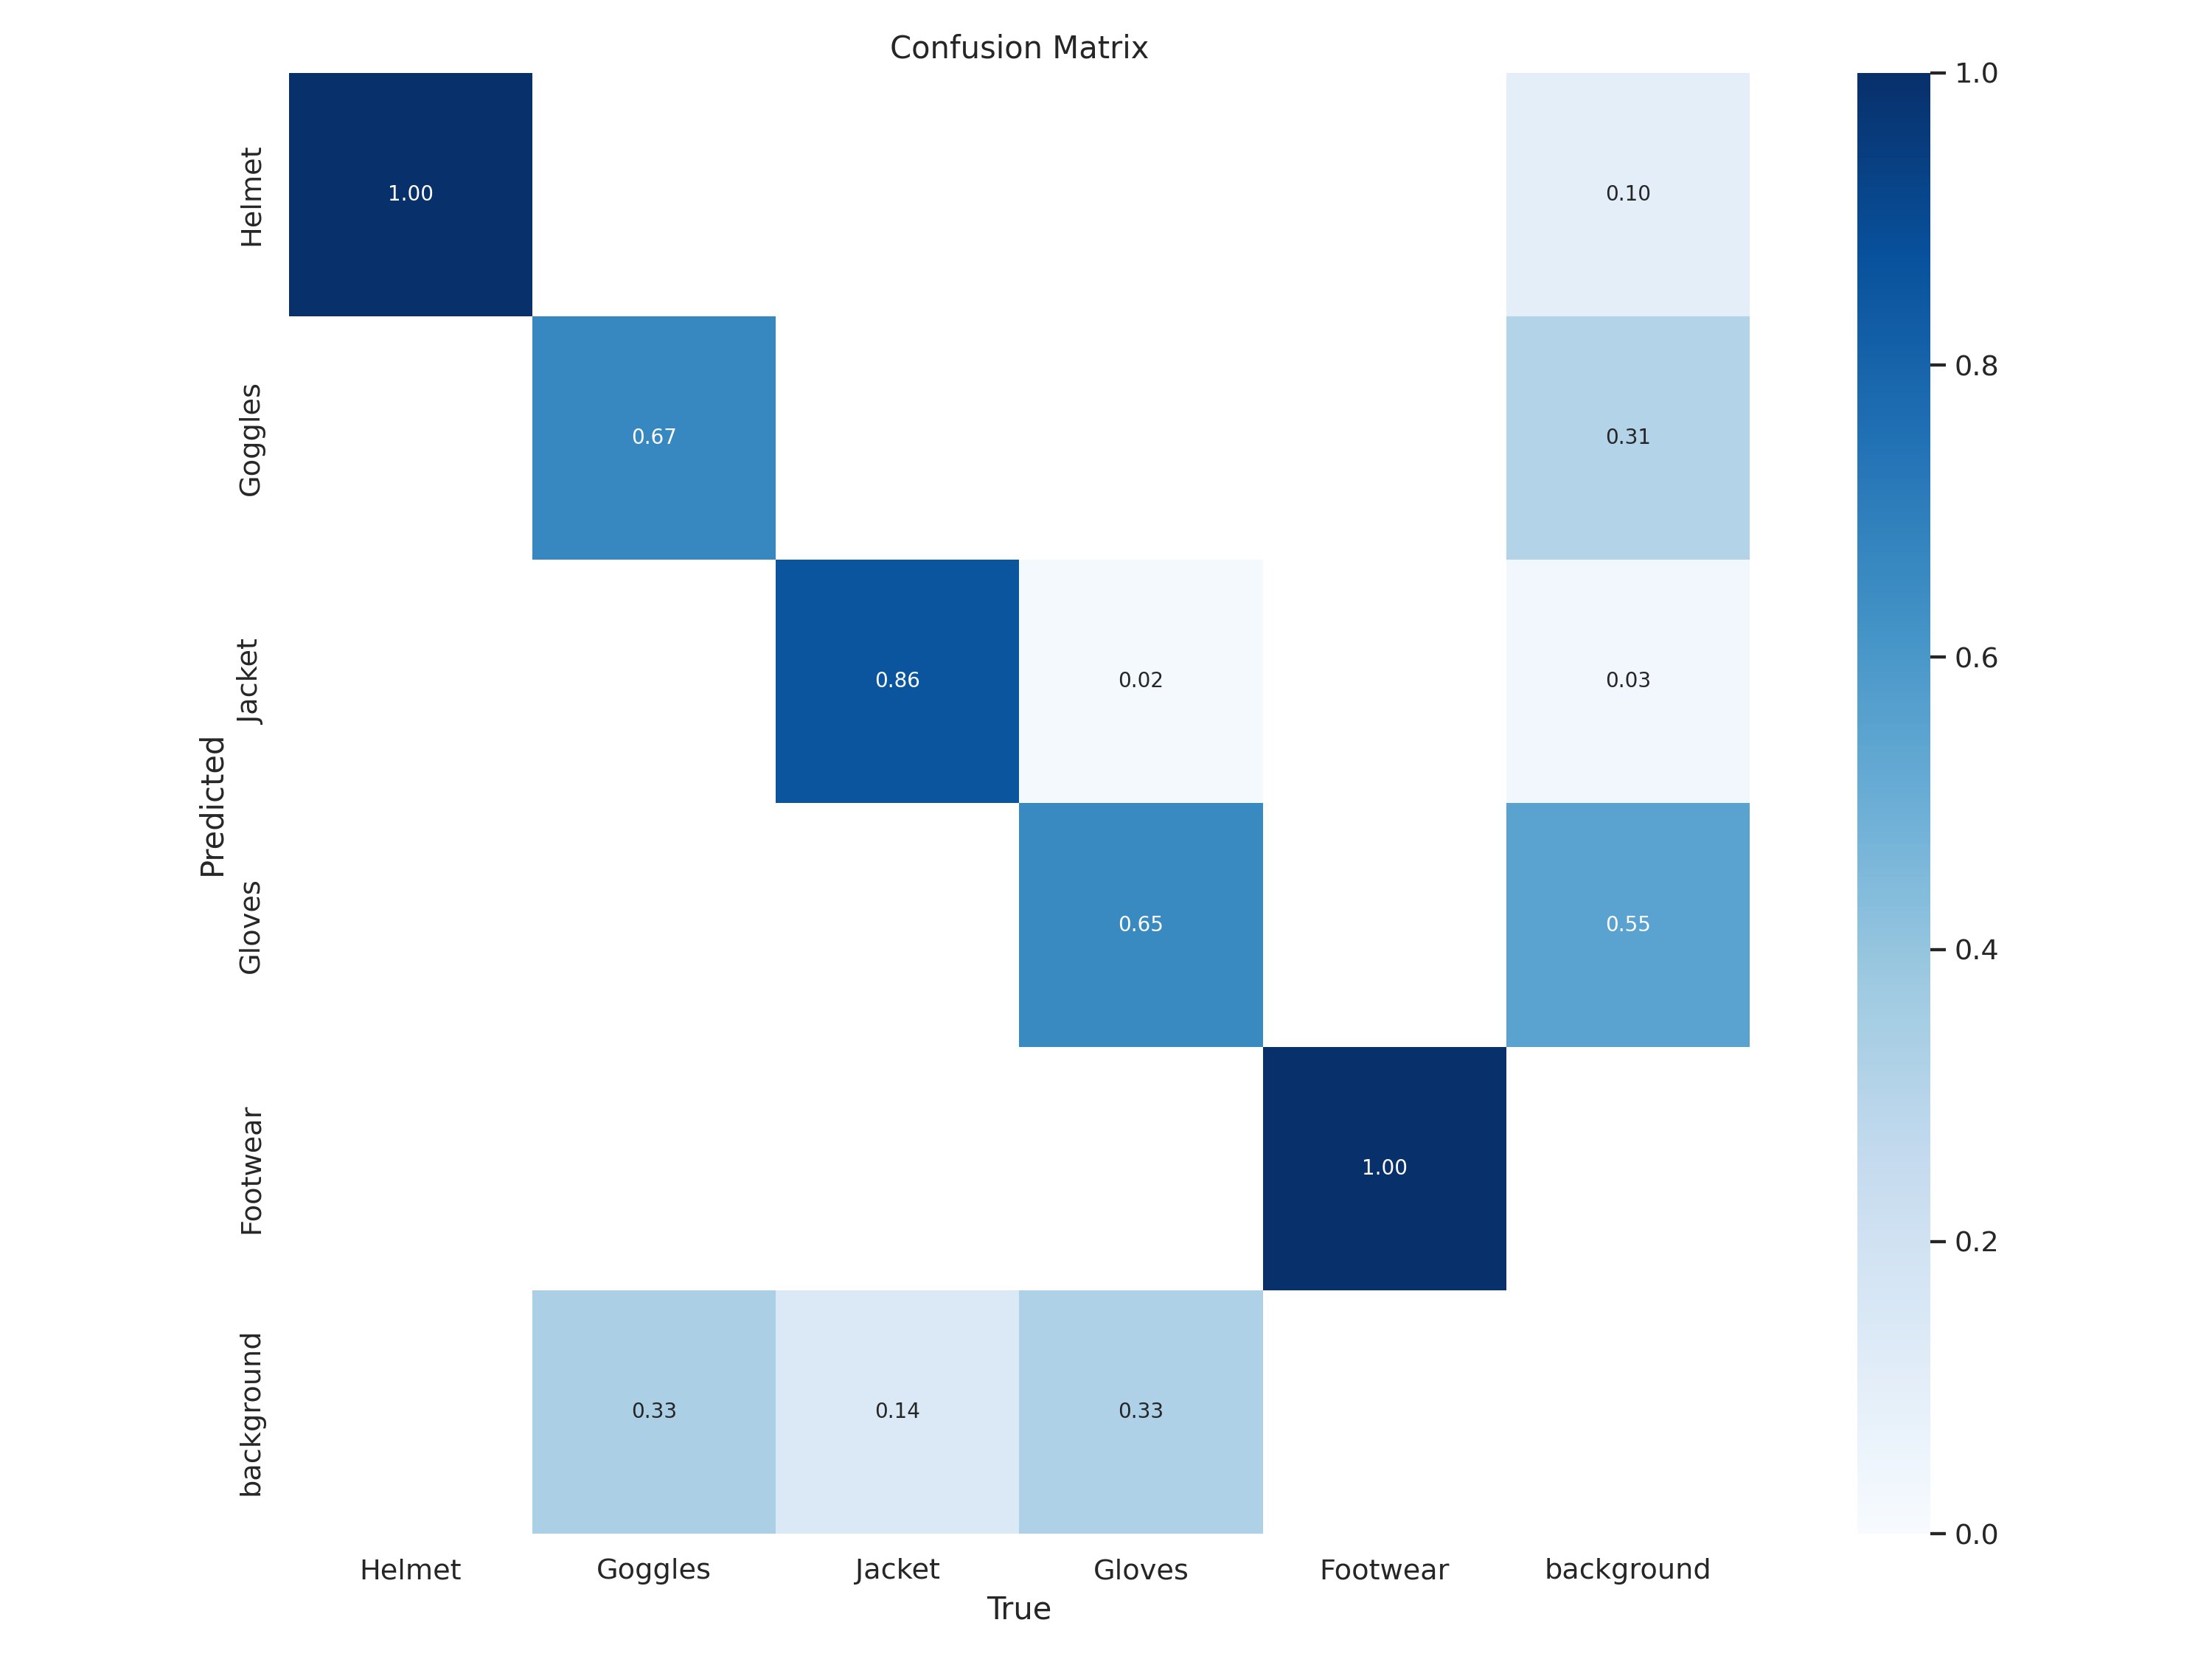

In [19]:
Image(filename='runs/detect/train5/confusion_matrix.png', width=600)

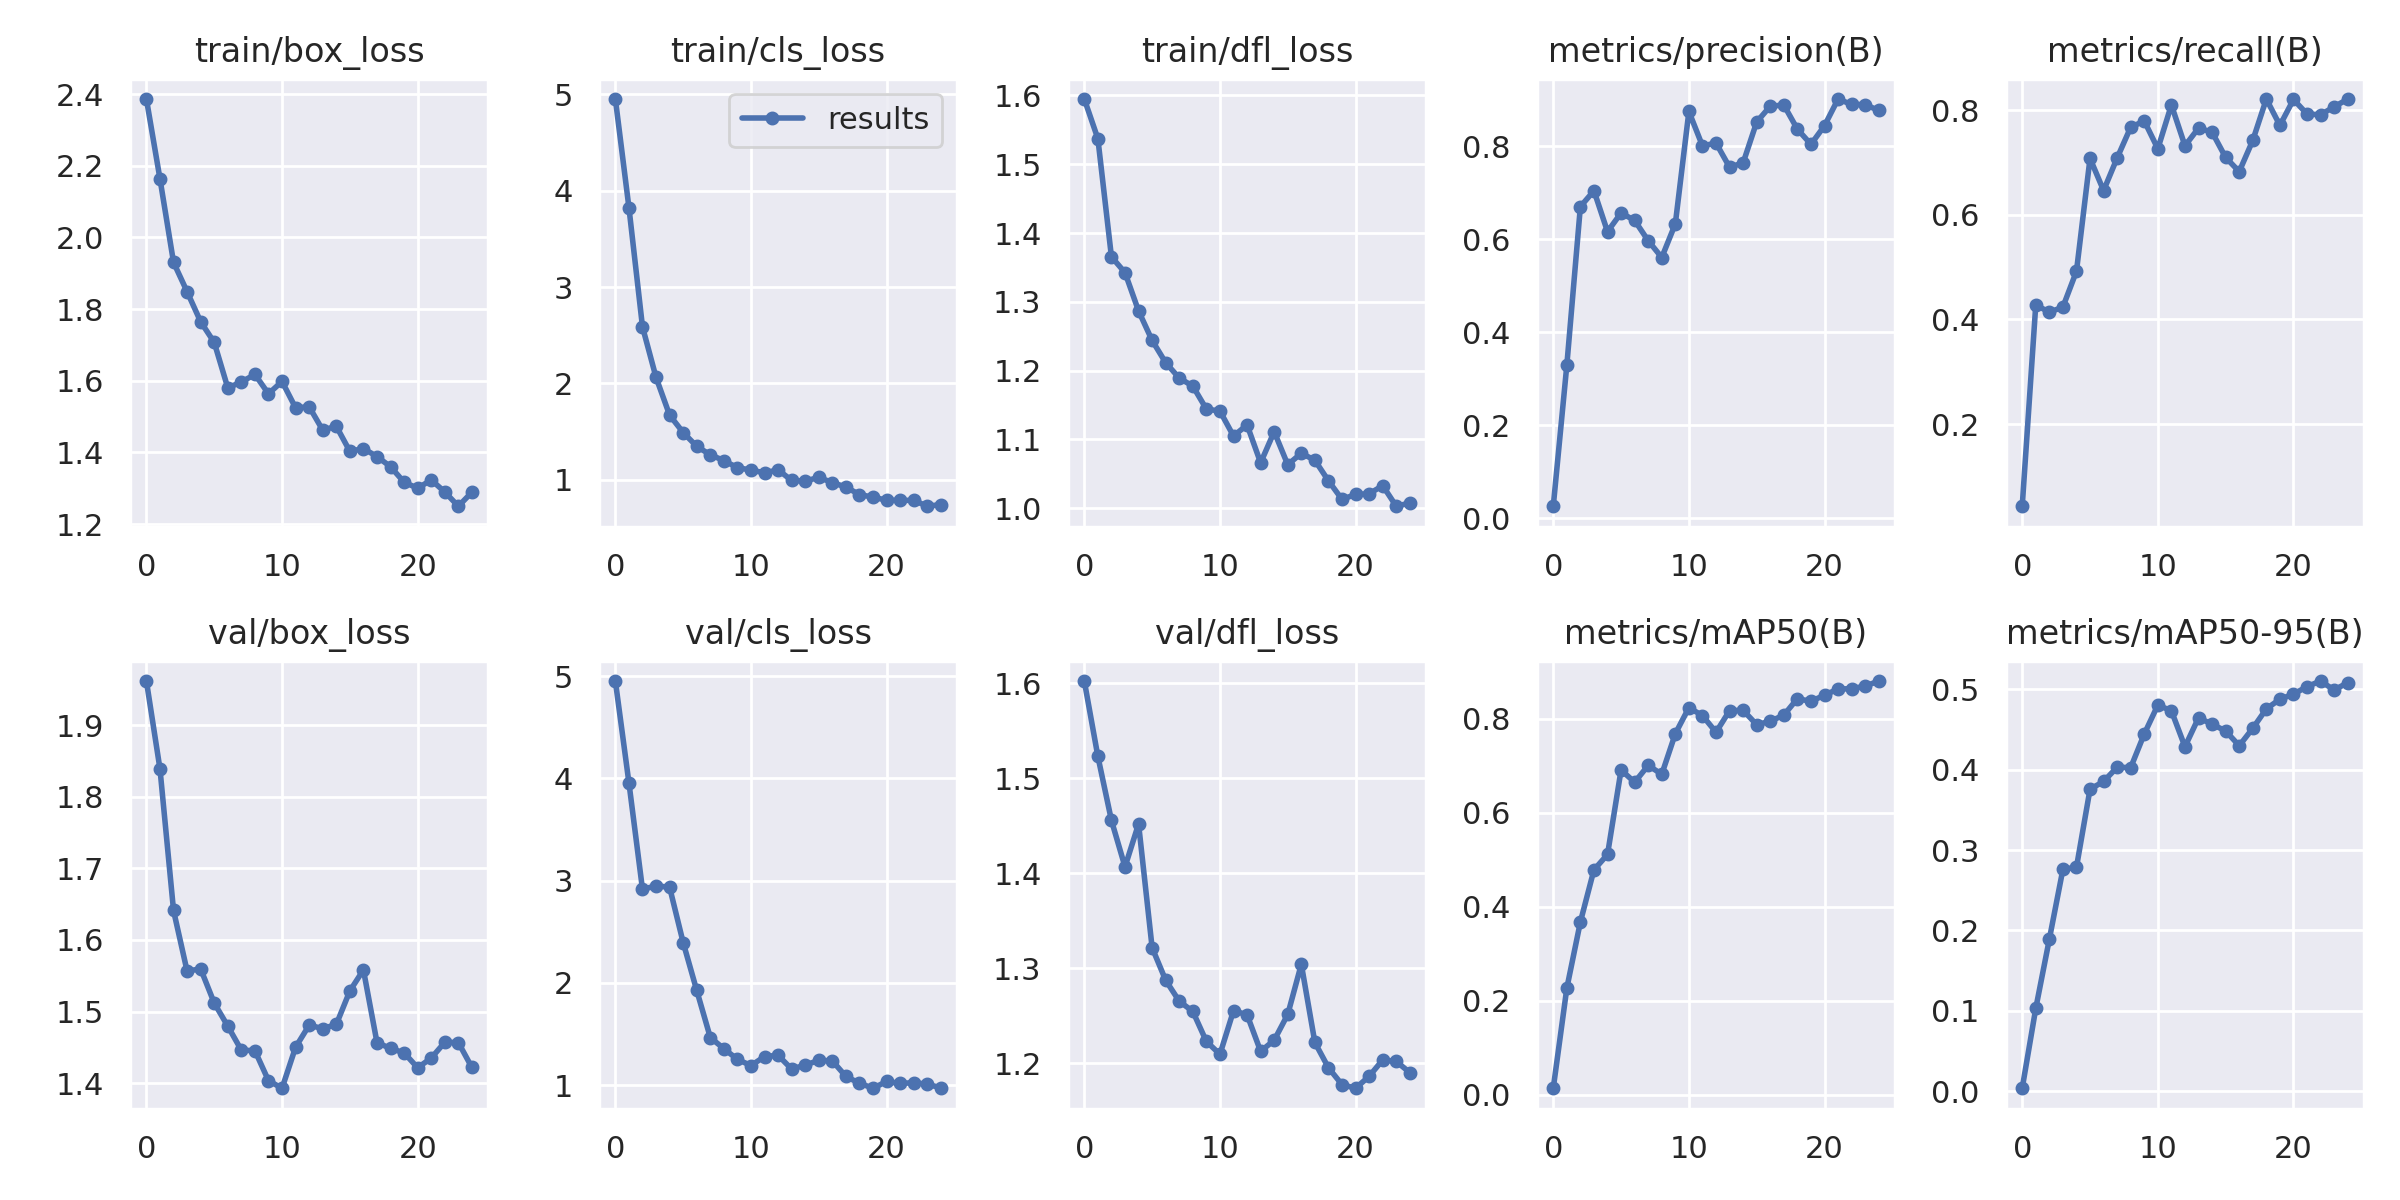

In [20]:
Image(filename='runs/detect/train5/results.png', width=600)

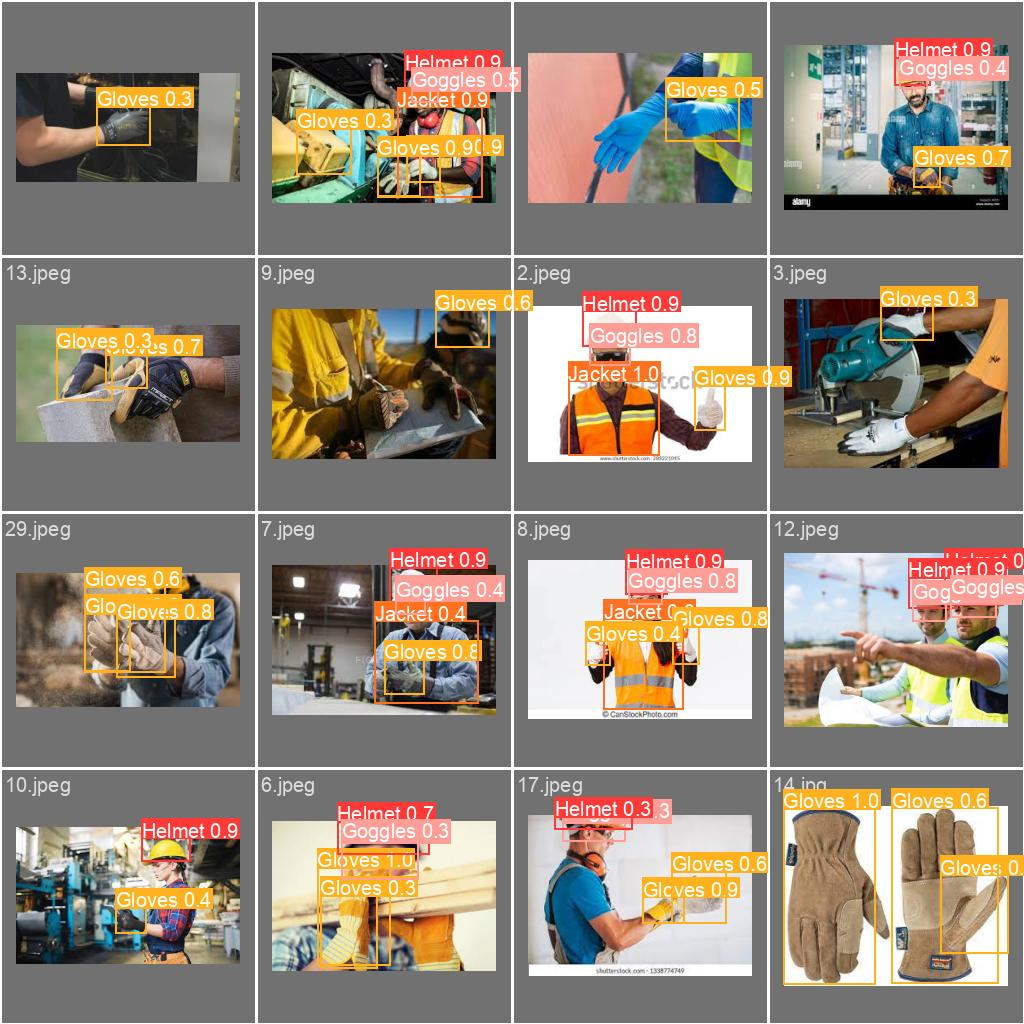

In [21]:
Image(filename='runs/detect/train5/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=data.yaml

2024-08-07 14:26:20.880683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 14:26:20.913156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 14:26:20.923278: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 14:26:20.946092: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 14:26:22.318886: W tensorflow/compiler/tf2

## Inference with Custom Model

In [24]:
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.5 source=/content/drive/MyDrive/YOLO/data/data/test/images

2024-08-07 14:26:49.194828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 14:26:49.218257: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 14:26:49.225279: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 14:26:49.241942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 14:26:50.621488: W tensorflow/compiler/tf2

In [ ]:
!pip install matplotlib opencv-python


['/content/drive/MyDrive/YOLO/data/data/test/images/14.jpg']


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded


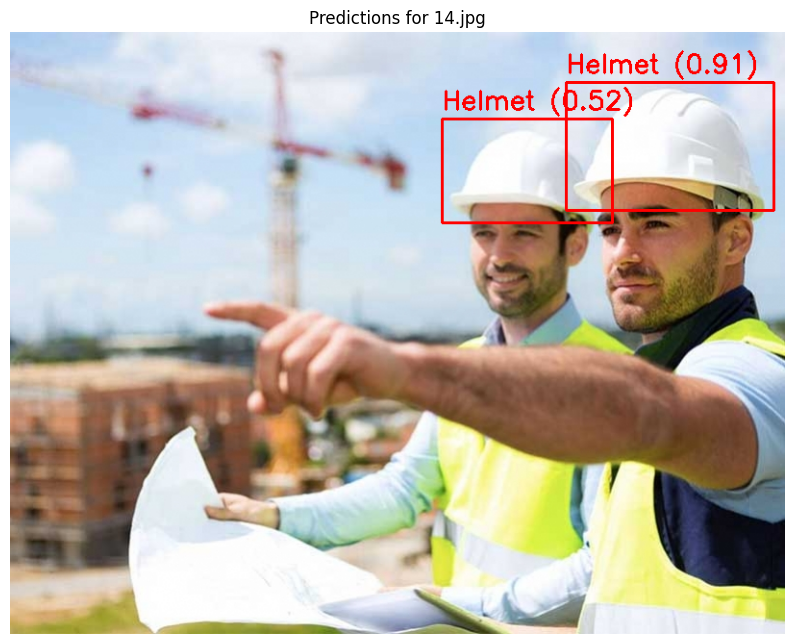

In [25]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np
from PIL import Image

# Function to draw bounding boxes and labels on the image
def draw_boxes(image, boxes, labels, confidences):
    for box, label, confidence in zip(boxes, labels, confidences):
        # Convert bounding box coordinates to integers
        x1, y1, x2, y2 = [int(coord) for coord in box]
        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # Draw the label and confidence
        text = f'{label} ({confidence:.2f})'
        cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return image

# Function to display an image with matplotlib
def display_image(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the custom model
model = YOLO('runs/detect/train2/weights/best.pt')

# Directory containing the test images
test_image_dir = '/content/drive/MyDrive/YOLO/data/data/test/images'
image_paths = glob(os.path.join(test_image_dir, '*.jpg'))

print(image_paths)
# Load images as NumPy arrays
images = [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) for img_path in image_paths]

# Predict on the test dataset
results = model.predict(source=images, conf=0.50)

# Iterate through the results and display images with bounding boxes and labels
for img_path, result in zip(image_paths, results):
    # Load the image (again for display purposes)
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # Get bounding boxes, labels, and confidences
    boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
    labels = [model.names[int(cls)] for cls in result.boxes.cls]  # Class labels
    confidences = result.boxes.conf.cpu().numpy()  # Confidences

    # Draw bounding boxes and labels on the image
    image_with_boxes = draw_boxes(image, boxes, labels, confidences)

    # Display the image
    display_image(image_with_boxes, title=f"Predictions for {os.path.basename(img_path)}")
